#  Impact of Market Sentiment on Trader Performance in Bitcoin Markets.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
sentiment=pd.read_csv("csv_files/fear_greed_index.csv")
trades=pd.read_csv("csv_files/historical_data.csv")

In [12]:
sentiment['Date']=pd.to_datetime(sentiment['date'])
trades['Timestamp IST']=pd.to_datetime(trades['Timestamp IST'], dayfirst=True)

#### SENTIMENT INSPECTION

In [13]:
sentiment.head(10)

timestamp  value classification        date       Date
0  1517463000     30           Fear  2018-02-01 2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02 2018-02-02
2  1517635800     40           Fear  2018-02-03 2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04 2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05 2018-02-05
5  1517895000      8   Extreme Fear  2018-02-06 2018-02-06
6  1517981400     36           Fear  2018-02-07 2018-02-07
7  1518067800     30           Fear  2018-02-08 2018-02-08
8  1518154200     44           Fear  2018-02-09 2018-02-09
9  1518240600     54        Neutral  2018-02-10 2018-02-10

In [14]:
sentiment.shape

(2644, 5)

In [15]:
sentiment.columns

Index(['timestamp', 'value', 'classification', 'date', 'Date'], dtype='object')

In [16]:
sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
Date              0
dtype: int64

In [17]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   object        
 4   Date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 103.4+ KB


#### TRADES INSPECTION

In [18]:
trades.head(10)

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
5  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9900   
6  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9934   
7  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   
8  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   
9  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           8.0000   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   
5         1.41     11.27  BUY 2024-12-02 22:50:00     1298.215466       Buy   
6       144.09   1151.77  BUY 2024-12-02 22:50:00     1299.624972       Buy   
7        34.00    272.00  BUY 2024-12-02 22:50:00     1443.664541       Buy   
8        46.00    368.00  BUY 2024-12-02 22:50:00     1477.652641       Buy   
9        12.50    100.00  BUY 2024-12-02 22:50:00     1523.636541       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
5         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
6         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
7         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
8         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
9         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp  
0     True  0.345404  8.950000e+14  1.730000e+12  
1     True  0.005600  4.430000e+14  1.730000e+12  
2     True  0.050431  6.600000e+14  1.730000e+12  
3     True  0.050043  1.080000e+15  1.730000e+12  
4     True  0.003055  1.050000e+15  1.730000e+12  
5     True  0.000493  7.330000e+14  1.730000e+12  
6     True  0.050431  9.060000e+14  1.730000e+12  
7     True  0.011900  3.960000e+14  1.730000e+12  
8     True  0.016100  9.460000e+14  1.730000e+12  
9     True  0.004375  3.470000e+13  1.730000e+12

In [19]:
trades.shape

(211224, 16)

In [20]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [21]:
trades.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [22]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

#### DATA CLEANING & PREPARATION

In [23]:
# Cleaning Sentiment Data
sentiment['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [24]:
sentiment_map={'Fear':1,
             'Extreme Fear':2,
             'Neutral':3,
             'Greed':4,
             'Extreme Greed':5}
sentiment['sentiment_score']=sentiment['classification'].map(sentiment_map)

In [25]:
sentiment.head(5)

timestamp  value classification        date       Date  sentiment_score
0  1517463000     30           Fear  2018-02-01 2018-02-01                1
1  1517549400     15   Extreme Fear  2018-02-02 2018-02-02                2
2  1517635800     40           Fear  2018-02-03 2018-02-03                1
3  1517722200     24   Extreme Fear  2018-02-04 2018-02-04                2
4  1517808600     11   Extreme Fear  2018-02-05 2018-02-05                2

In [26]:
# Prepare Trader Data
columns_needed = [
    'Account', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
    'Timestamp IST', 'Closed PnL', 'Transaction Hash', 'Trade ID']
trader= trades[columns_needed].copy()

In [27]:
trades['Date'] = trades['Timestamp IST'].dt.date
trades['Date'] = pd.to_datetime(trades['Date'])
trades.head(5)

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
1         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
2         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
3         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   
4         0.0  0xec09451986a1874e3a980418412fcd0201f500c95bac...  52017706630   

   Crossed       Fee      Trade ID     Timestamp       Date  
0     True  0.345404  8.950000e+14  1.730000e+12 2024-12-02  
1     True  0.005600  4.430000e+14  1.730000e+12 2024-12-02  
2     True  0.050431  6.600000e+14  1.730000e+12 2024-12-02  
3     True  0.050043  1.080000e+15  1.730000e+12 2024-12-02  
4     True  0.003055  1.050000e+15  1.730000e+12 2024-12-02

### Merge on Date Both DataSets

##### -> We aligned each trade with the Bitcoin market sentiment of the same day

In [28]:
merged = pd.merge(trades, sentiment, on='Date', how='left')
merged.head(5)

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ... Crossed       Fee      Trade ID     Timestamp       Date  \
0         0.0  ...    True  0.345404  8.950000e+14  1.730000e+12 2024-12-02   
1         0.0  ...    True  0.005600  4.430000e+14  1.730000e+12 2024-12-02   
2         0.0  ...    True  0.050431  6.600000e+14  1.730000e+12 2024-12-02   
3         0.0  ...    True  0.050043  1.080000e+15  1.730000e+12 2024-12-02   
4         0.0  ...    True  0.003055  1.050000e+15  1.730000e+12 2024-12-02   

      timestamp value  classification        date sentiment_score  
0  1.733117e+09  80.0   Extreme Greed  2024-12-02             5.0  
1  1.733117e+09  80.0   Extreme Greed  2024-12-02             5.0  
2  1.733117e+09  80.0   Extreme Greed  2024-12-02             5.0  
3  1.733117e+09  80.0   Extreme Greed  2024-12-02             5.0  
4  1.733117e+09  80.0   Extreme Greed  2024-12-02             5.0  

[5 rows x 22 columns]

### FEATURE ENGINNERING

##### Create useful metrics

In [29]:
# Profit Flag
merged['is_Profitable']=merged['Closed PnL'] > 0

In [30]:
# Absolute PnL
merged['abs_pnl']=merged['Closed PnL'].abs()

In [31]:
# Trade Direction
merged['trade_direction']=merged['Side'].map({'BUY':1, 'SELL':-1})


In [32]:
merged.head(5)

Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL  ...     Timestamp       Date     timestamp  value  \
0         0.0  ...  1.730000e+12 2024-12-02  1.733117e+09   80.0   
1         0.0  ...  1.730000e+12 2024-12-02  1.733117e+09   80.0   
2         0.0  ...  1.730000e+12 2024-12-02  1.733117e+09   80.0   
3         0.0  ...  1.730000e+12 2024-12-02  1.733117e+09   80.0   
4         0.0  ...  1.730000e+12 2024-12-02  1.733117e+09   80.0   

   classification        date sentiment_score  is_Profitable  abs_pnl  \
0   Extreme Greed  2024-12-02             5.0          False      0.0   
1   Extreme Greed  2024-12-02             5.0          False      0.0   
2   Extreme Greed  2024-12-02             5.0          False      0.0   
3   Extreme Greed  2024-12-02             5.0          False      0.0   
4   Extreme Greed  2024-12-02             5.0          False      0.0   

  trade_direction  
0               1  
1               1  
2               1  
3               1  
4               1  

[5 rows x 25 columns]

### Exploratory Data Analysis (EDA)

In [33]:
# Average PnL per Sentiment
avg_PnL_sentiment=merged.groupby('classification')['Closed PnL'].mean()
win_rate_sentiment=merged.groupby('classification')['is_Profitable'].mean()

#### Average PnL per Sentiment

In [34]:
avg_PnL_sentiment

classification
Extreme Fear     34.537862
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Neutral          34.307718
Name: Closed PnL, dtype: float64

#### Win Rate per Sentiment

In [35]:
win_rate_sentiment

classification
Extreme Fear     0.370607
Extreme Greed    0.464943
Fear             0.420768
Greed            0.384828
Neutral          0.396991
Name: is_Profitable, dtype: float64

### VISUALIZATIONS


##### Bar Chart – Avg PnL vs Sentiment

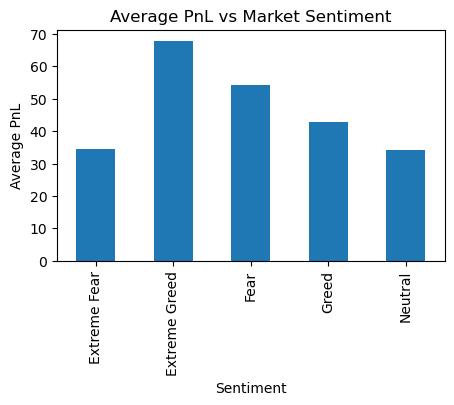

In [36]:
plt.figure(figsize=(5, 3)) 
avg_PnL_sentiment.plot(kind='bar')
plt.title('Average PnL vs Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average PnL')
plt.show()


##### Boxplot – PnL Distribution by Sentiment

<Figure size 200x100 with 0 Axes>

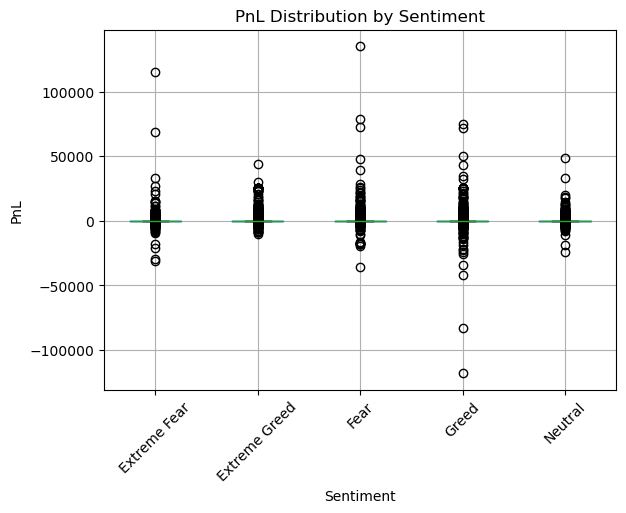

In [38]:
plt.figure(figsize=(2, 1)) 
merged.boxplot(column='Closed PnL', by='classification', rot=45)
plt.title('PnL Distribution by Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('PnL')
plt.show()


##### Countplot – Trades per Sentiment

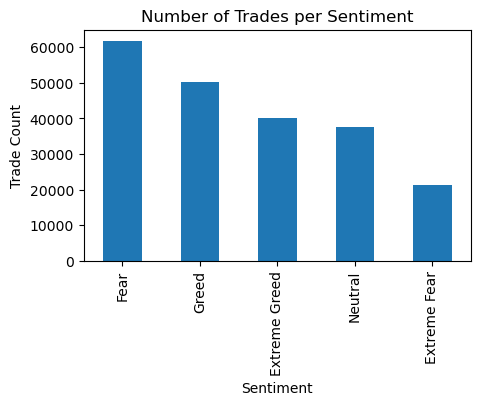

In [43]:
plt.figure(figsize=(5, 3)) 
merged['classification'].value_counts().plot(kind='bar')
plt.title('Number of Trades per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Trade Count')
plt.show()

### Trader Behavior Analysis

In [44]:
# Is volatility higher during Fear?
# Higher std = higher volatility
merged.groupby('classification')['Closed PnL'].std()

classification
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed PnL, dtype: float64

In [45]:
# Are losses larger during Extreme Greed?
# Extreme Greed ka abs_pnl zyada ho → losses bigger
merged.groupby('classification')['abs_pnl'].mean()

classification
Extreme Fear     94.007169
Extreme Greed    81.440567
Fear             73.489062
Greed            84.835917
Neutral          54.967150
Name: abs_pnl, dtype: float64

In [46]:
merged.to_csv("Merged.csv", index=False)